<a href="https://colab.research.google.com/github/macgyver121/IS_DADS/blob/main/word2vec_data%2BCfC_rnd50_acc5828.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

# Install Library

In [5]:
pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pandas as pd
import numpy as np
import re
import emoji

from pythainlp.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

from gensim.test.utils import common_texts
from gensim.models import Word2Vec

from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.callbacks import History

import tensorflow as tf

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

from datetime import datetime
from keras import callbacks

import keras.backend as K

# Import file

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# import csv file
df = pd.read_csv('/content/drive/MyDrive/data_all.csv', delimiter=',')

In [11]:
df.loc[:,'text'] = df.loc[:,'text'].map(word_tokenize)

In [12]:
df

,label,text
0,1.0,[1]
1,1.0,[สวัสดี]
2,1.0,"[อรุณสวัสดิ์, , ดู, ข่าว]"
3,1.0,"[D, , jai]"
4,1.0,"[สวัสดี, ชาวโลก]"
...,...,...
11954,1.0,"[จุดแข็ง, หัว, , จุดอ่อน, ที่อยู่]"
11955,1.0,[]
11956,1.0,"[เจอ, ไฟไหม้, , โทร, แจ้ง, , เบอร์]"
11957,0.0,"[แม่, ง, เก่ง]"


## create list of text

In [13]:
sent = [row for row in df['text']]

In [14]:
# Average String lengths in list
# using map() + sum() + len()
res = sum(map(len, sent))/float(len(sent))
 
# printing result
print("The Average length of String in list is : " + str(res))

The Average length of String in list is : 5.186804916799064


In [15]:
sent[2]

['อรุณสวัสดิ์', ' ', 'ดู', 'ข่าว']

In [16]:
#len(max(sent))

## Tokenize and pad sequence

In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.text)

In [18]:
# create X
X = pad_sequences(tokenizer.texts_to_sequences(df.text), maxlen=20)
X

array([[   0,    0,    0, ...,    0,    0,  133],
       [   0,    0,    0, ...,    0,    0,   39],
       [   0,    0,    0, ...,    1,   25,   20],
       ...,
       [   0,    0,    0, ...,  692,    1,  891],
       [   0,    0,    0, ...,   19,   71,   41],
       [   0,    0,    0, ...,    0,    0, 3979]], dtype=int32)

In [19]:
# create y
y = df['label']
y.shape

(11959,)

# Load Word2Vec(TNCc5model)

In [20]:
# load pretrained model
model = Word2Vec.load("http://www.arts.chula.ac.th/ling/wp-content/uploads/TNCc5model.bin")

In [21]:
# model.save("TNCc5model.model")

In [22]:
# model = Word2Vec.load("TNCc5model.model")

In [23]:
# create vocab_size, embedding_dim and embedding_matrix
vocab_size = len(model.wv)
embedding_dim = model.vector_size
embedding_matrix = np.zeros((vocab_size, embedding_dim))

In [24]:
for i, word in enumerate(model.wv):
    embedding_matrix[i] = word

KeyError: ignored

In [25]:
embedding_matrix[31077]

array([-0.08747477, -0.03003867,  0.0696032 ,  0.03697103, -0.04840473,
        0.04570374,  0.08035568,  0.09319719,  0.0328302 ,  0.0205396 ,
        0.05725439,  0.07493409, -0.05307385,  0.06657625,  0.02432919,
       -0.01523621, -0.03918364,  0.00505913,  0.09474613,  0.07713508,
        0.01310679,  0.01618158,  0.03159253, -0.05961249, -0.00540888,
        0.01102536,  0.03336877, -0.09733387, -0.0455462 ,  0.00984617,
        0.0461374 ,  0.04063138, -0.01614906,  0.02336541, -0.05779864,
       -0.01610914, -0.09162895, -0.06487005, -0.01570138,  0.01779037,
       -0.01921744, -0.01817694,  0.12782034,  0.0127709 , -0.00602525,
       -0.03969072,  0.01731815,  0.00555995,  0.04609034,  0.05480786,
        0.05582551, -0.02981856, -0.01753935, -0.03173018,  0.03811059,
        0.08742324, -0.03593688, -0.08428604,  0.00821297, -0.03246153,
       -0.04117111,  0.11976431, -0.02667627, -0.03977206, -0.01023334,
        0.09782189,  0.02933291, -0.05686831,  0.0734435 , -0.03

# Create model

In [26]:
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=20, trainable=False)

In [27]:
import keras
from tensorflow.keras.layers import SpatialDropout1D

In [28]:
!pip install seaborn ncps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.3 MB/s eta 0:00:00


In [29]:
import numpy as np
import os
from tensorflow import keras
from ncps import wirings
from ncps.tf import LTC, CfC
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
fc_wiring = wirings.FullyConnected(8, 3)  # 8 units, 1 of which is a motor neuron
rnd_wiring = wirings.Random(8, 3,sparsity_level=0.5)  # 8 units, 1 motor neuron
ncp_arch = wirings.AutoNCP(8,3) # 8 units, 1 motor neuron

In [46]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.1))
#model.add(LSTM(128, return_sequences=True))
#model.add(Dropout(0.1))
#model.add(LTC(fc_wiring, return_sequences=True))
#model.add(LSTM(128, return_sequences=True))
#model.add(LTC(rnd_wiring))
#model.add(LTC(fc_wiring, return_sequences=True))
#model.add(Dropout(0.1))
#model.add(LSTM(128))
model.add(CfC(rnd_wiring))
#model.add(LTC(rnd_wiring, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
#model.add(LTC(rnd_wiring))

model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 100)           3107800   
                                                                 
 dropout_2 (Dropout)         (None, 20, 100)           0         
                                                                 
 cf_c_1 (CfC)                (None, 3)                 3488      
                                                                 
 dropout_3 (Dropout)         (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
Total params: 3,111,300
Trainable params: 3,500
Non-trainable params: 3,107,800
_________________________________________________________________
None


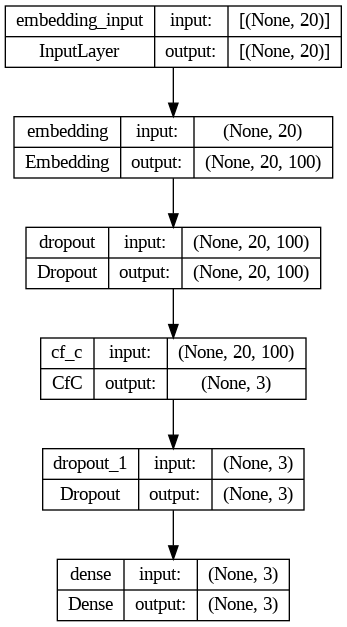

In [32]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Splitting Data and prepare X and y

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Apply SMOTE to the training data
smote = SMOTE()
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_train_oversampled, y_train_oversampled, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (13599, 20) (13599,)
Validation Set -> (4533, 20) (4533,)
Test Set -> (2392, 20) (2392,)


## Data distribution

<Axes: >

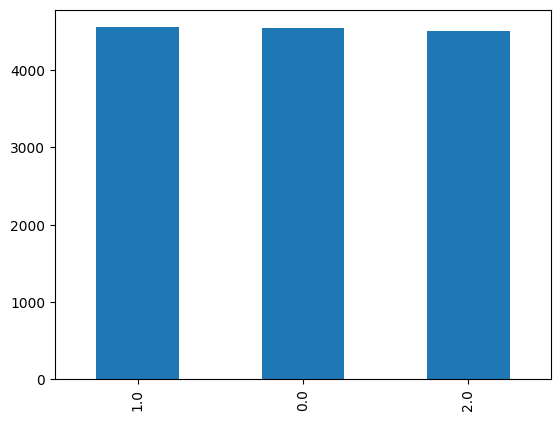

In [36]:
CountStatus = pd.value_counts(y_train.values)
CountStatus.plot.bar()

In [37]:
#CountStatus = pd.value_counts(y_val.values)
#CountStatus.plot.bar()

<Axes: >

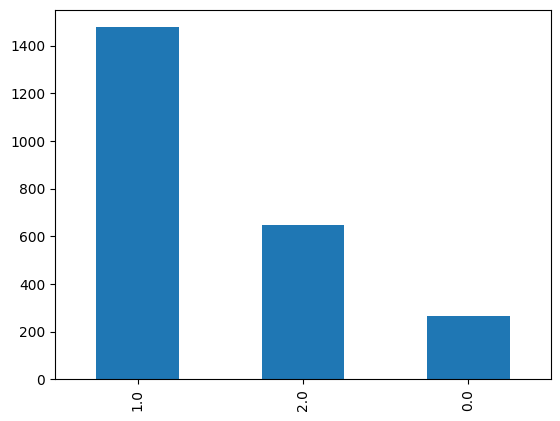

In [38]:
CountStatus = pd.value_counts(y_test.values)
CountStatus.plot.bar()

## create y to 3 output

In [39]:
y_train = pd.get_dummies(y_train)
y_val = pd.get_dummies(y_val)
y_test = pd.get_dummies(y_test)

In [40]:
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (13599, 20) (13599, 3)
Validation Set -> (4533, 20) (4533, 3)
Test Set -> (2392, 20) (2392, 3)


# Train Data

In [47]:
start_time = datetime.now()

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=8)
#callbacks=[checkpointer]

#model.load_weights('weights.hdf5')

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/25
1700/1700 [==============================] - 40s 19ms/step - loss: 1.4235 - accuracy: 0.3761 - precision_1: 0.3943 - recall_1: 0.2389 - val_loss: 1.1259 - val_accuracy: 0.3880 - val_precision_1: 0.4555 - val_recall_1: 0.1546
Epoch 2/25
1700/1700 [==============================] - 30s 17ms/step - loss: 1.1142 - accuracy: 0.4011 - precision_1: 0.4823 - recall_1: 0.1637 - val_loss: 1.0600 - val_accuracy: 0.4132 - val_precision_1: 0.6087 - val_recall_1: 0.1074
Epoch 3/25
1700/1700 [==============================] - 29s 17ms/step - loss: 1.0585 - accuracy: 0.4161 - precision_1: 0.5794 - recall_1: 0.1261 - val_loss: 1.0374 - val_accuracy: 0.4335 - val_precision_1: 0.6361 - val_recall_1: 0.1118
Epoch 4/25
1700/1700 [==============================] - 30s 18ms/step - loss: 1.0337 - accuracy: 0.4396 - precision_1: 0.6175 - recall_1: 0.1391 - val_loss: 1.0221 - val_accuracy: 0.4694 - val_precision_1: 0.6365 - val_recall_1: 0.1538
Epoch 5/25
1700/1700 [==============================] - 

In [ ]:
#model.load_weights('weights.hdf5')

# Save model

In [ ]:
# Save the model architecture & the weights
#model.save('w2v_ws_lstm.h5')
#print('Best model saved')

Best model saved


# Evaluation1

In [48]:
def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [49]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.5828
Precision : 0.6952
Recall    : 0.3775
F1 Score  : 0.4893


75/75 [==============================] - 1s 5ms/step


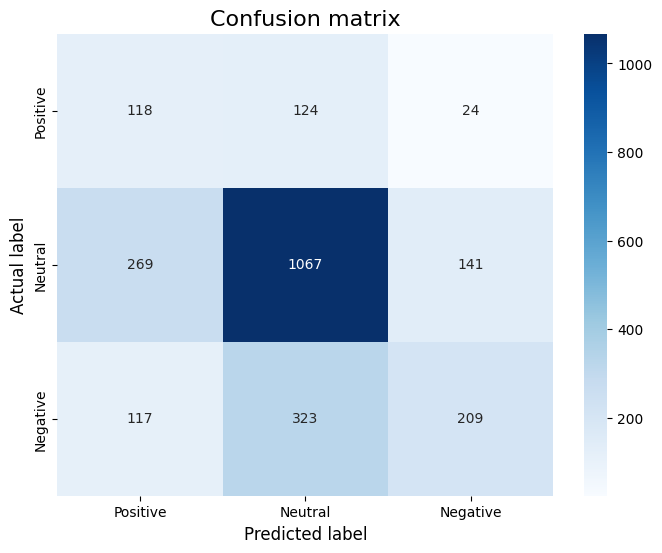

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Positive', 'Neutral', 'Negative']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('Actual label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

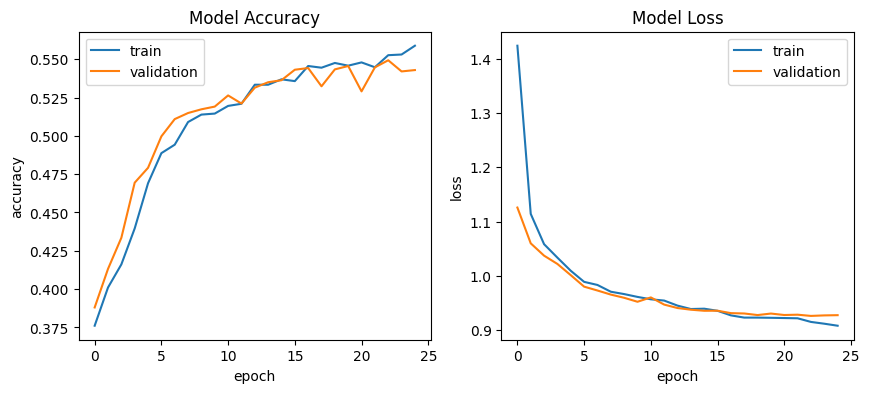

In [51]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

epoch = 15

In [52]:
y_pred = model.predict(X_test)
y_pred_lst = np.argmax(np.array(y_pred),axis=1)

75/75 [==============================] - 2s 19ms/step


In [53]:
# create y
y = df['label']
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred_lst = list(y_pred_lst)
y_test = list(y_test.astype(int))

In [54]:
# Print the precision and recall, among other metrics
from sklearn import metrics
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_lst))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred_lst, digits=3))

[[ 118  124   24]
 [ 269 1067  141]
 [ 117  323  209]]
              precision    recall  f1-score   support

           0      0.234     0.444     0.306       266
           1      0.705     0.722     0.713      1477
           2      0.559     0.322     0.409       649

    accuracy                          0.583      2392
   macro avg      0.499     0.496     0.476      2392
weighted avg      0.613     0.583     0.585      2392



# Train Again from graph

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.1))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.1))
#model.add(LTC(fc_wiring, return_sequences=True))
#model.add(LSTM(128, return_sequences=True))
#model.add(LTC(rnd_wiring))
#model.add(LTC(fc_wiring, return_sequences=True))
#model.add(Dropout(0.1))
#model.add(LSTM(128))
model.add(CfC(rnd_wiring))
#model.add(LTC(rnd_wiring, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
#model.add(LTC(rnd_wiring))

model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           3107800   
                                                                 
 dropout_3 (Dropout)         (None, 40, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 40, 128)           117248    
                                                                 
 dropout_4 (Dropout)         (None, 40, 128)           0         
                                                                 
 cf_c_1 (CfC)                (None, 3)                 4384      
                                                                 
 dropout_5 (Dropout)         (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                

In [ ]:
start_time = datetime.now()

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=6, batch_size=8)
#callbacks=[checkpointer]

#model.load_weights('weights.hdf5')

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/6
1700/1700 [==============================] - 125s 66ms/step - loss: 1.0179 - accuracy: 0.4561 - precision_1: 0.6438 - recall_1: 0.1493 - val_loss: 0.9647 - val_accuracy: 0.5153 - val_precision_1: 0.6533 - val_recall_1: 0.2623
Epoch 2/6
1700/1700 [==============================] - 112s 66ms/step - loss: 0.9563 - accuracy: 0.5172 - precision_1: 0.6628 - recall_1: 0.2705 - val_loss: 0.9497 - val_accuracy: 0.5261 - val_precision_1: 0.6259 - val_recall_1: 0.3318
Epoch 3/6
1700/1700 [==============================] - 108s 64ms/step - loss: 0.9119 - accuracy: 0.5525 - precision_1: 0.6794 - recall_1: 0.3344 - val_loss: 0.9140 - val_accuracy: 0.5522 - val_precision_1: 0.6519 - val_recall_1: 0.3887
Epoch 4/6
1700/1700 [==============================] - 110s 65ms/step - loss: 0.8711 - accuracy: 0.5845 - precision_1: 0.6857 - recall_1: 0.3836 - val_loss: 0.9074 - val_accuracy: 0.5630 - val_precision_1: 0.6527 - val_recall_1: 0.4139
Epoch 5/6
1700/1700 [==============================] - 1

# Evaluation2

In [ ]:
def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.5819
Precision : 0.6698
Recall    : 0.4231
F1 Score  : 0.5186


75/75 [==============================] - 3s 36ms/step


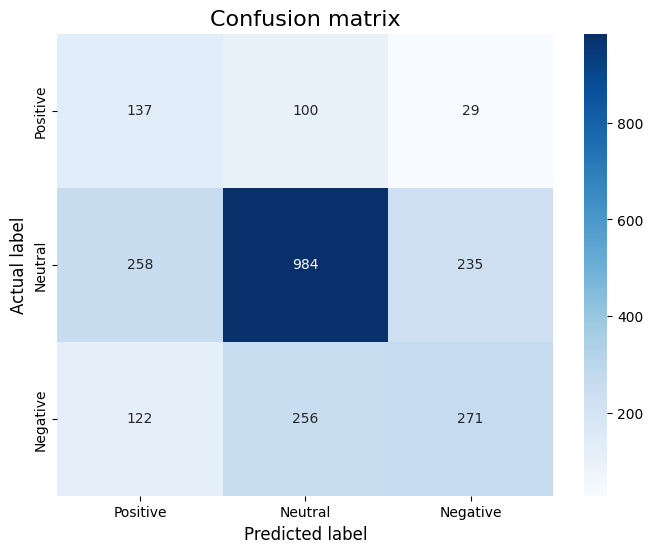

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Positive', 'Neutral', 'Negative']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('Actual label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
from keras.models import load_model

# Load model
#model = load_model('w2v_ws_lstm.h5')


167/167 [==============================] - 14s 68ms/step


In [ ]:
y_pred = model.predict(X_test)
y_pred_lst = np.argmax(np.array(y_pred),axis=1)

75/75 [==============================] - 4s 48ms/step


In [ ]:
# create y
y = df['label']
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred_lst = list(y_pred_lst)
y_test = list(y_test.astype(int))

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_lst))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred_lst, digits=3))

[[137 100  29]
 [258 984 235]
 [122 256 271]]
              precision    recall  f1-score   support

           0      0.265     0.515     0.350       266
           1      0.734     0.666     0.699      1477
           2      0.507     0.418     0.458       649

    accuracy                          0.582      2392
   macro avg      0.502     0.533     0.502      2392
weighted avg      0.620     0.582     0.594      2392



# Inference

In [ ]:
from keras.models import load_model

# Load model
model = load_model('w2v_ws_lstm.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Positive', 'Neutral', 'Negative']
    max_len=40
    
    # Transforms text to a sequence of integers using a tokenizer object
    t = [text]
    df2 = pd.DataFrame(list(t), columns = ['text'])
    df2.loc[:,'text'] = df2.loc[:,'text'].map(word_tokenize)
    # Pad sequences to the same length
    X = pad_sequences(tokenizer.texts_to_sequences(df2.text), maxlen=40)
    # Do the prediction using the loaded model
    yt = model.predict(X).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [ ]:
predict_class('ดีครับ')

1/1 [==============================] - 3s 3s/step
The predicted sentiment is Positive


In [ ]:
predict_class('ลุงตู่')

1/1 [==============================] - 0s 28ms/step
The predicted sentiment is Neutral


In [ ]:
predict_class('ไอ้ส้นตีน')

1/1 [==============================] - 0s 45ms/step
The predicted sentiment is Positive


In [ ]:
predict_class('สวัสดีวันจันทร์')

1/1 [==============================] - 0s 48ms/step
The predicted sentiment is Neutral
